This is a crude demonstration of what I'm thinking may work for us.

First a quick demo of using SciPy `binary_dilation`.

In [31]:
from scipy.ndimage import binary_dilation
import matplotlib.pyplot as plt
import numpy as np

Create a very simple, binary 5x5 array with a 1 at the center.

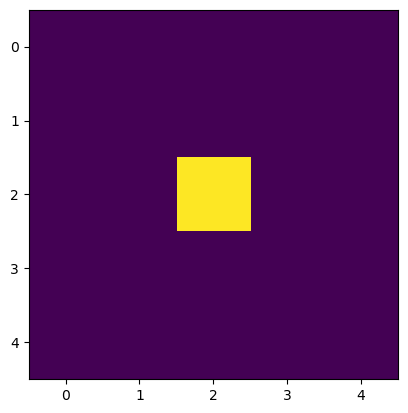

In [32]:
a = np.zeros((5,5))
a[2,2] = 1
plt.imshow(a)

Now, create our structuring element. We would use a different structuring element for each wedge (0-45 deg, 45-90 deg, and so on) of the raster. Remember that the origin will always be at the observer XY even though these examples place it at the center of the "image". Notice that the structuring element has 1's in the NNE wedge from 0 to 45 deg (0 being oriented "up" in this case).

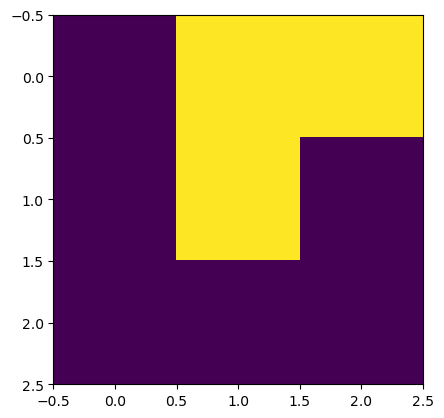

In [33]:
struct = np.zeros((3,3))
struct[1,1] = struct[0,1] = struct[0,2] = 1
plt.imshow(struct)

A simply binary dilation is performed by applying this to the "image" as shown.

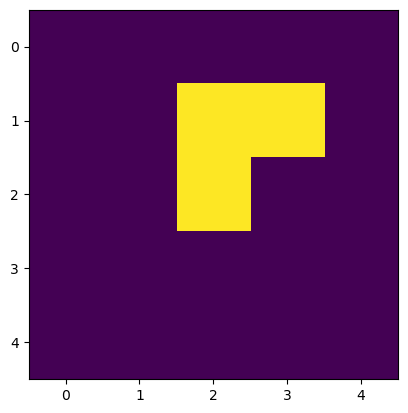

In [35]:
dilation = binary_dilation(a, struct).astype(a.dtype)
plt.imshow(dilation)

Rather than make the structuring element larger for larger possible "max penetration" distances, we can increase the number of iterations.

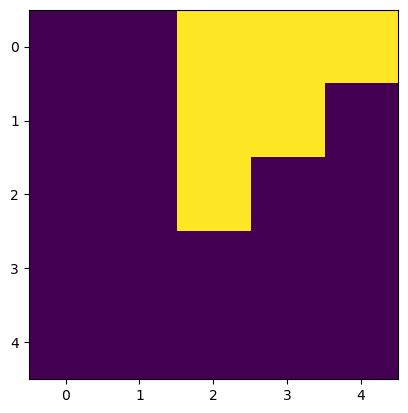

In [36]:
two_iterations = binary_dilation(a, struct, iterations=2).astype(a.dtype)
plt.imshow(two_iterations)

Let's come up with a slightly more complex example (though not much!).

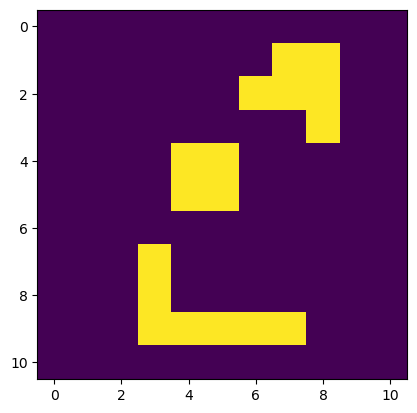

In [42]:
b = np.zeros((11,11))
b[4:6,4:6] = 1
b[2,6] = 1
b[3,8] = 1
b[1:3,7:9] = 1
b[7:10,3:4] = 1
b[9,4:8] = 1
plt.imshow(b)

Of course, if we apply the structuring element to the entire image, well, that's not really what we are after.

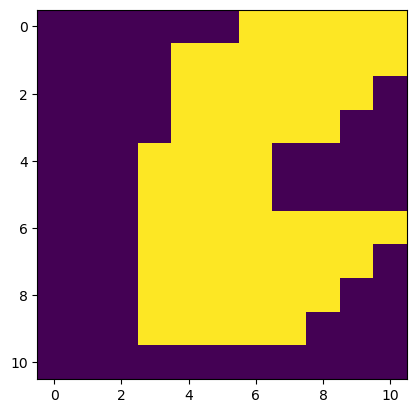

In [46]:
new_result = binary_dilation(b, struct, iterations=3).astype(a.dtype)
plt.imshow(new_result)

Instead, we can create a mask to define the region that we want it to apply to. In this case, we are interested in that NNE wedge. And there is probably a more elegant what to populate such an array.

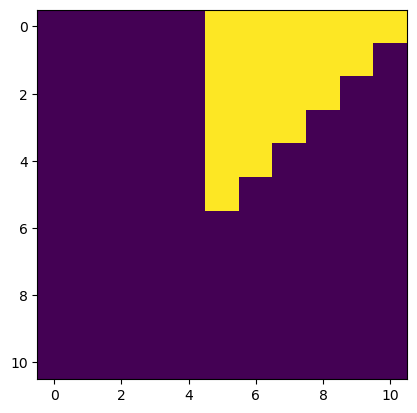

In [49]:
mask = np.zeros((11,11))
mask[0:6,5] = 1
mask[0:5,6] = 1
mask[0:4,7] = 1
mask[0:3,8] = 1
mask[0:2,9] = 1
mask[0,10] = 1
plt.imshow(mask)

Now, if we use this mask during the dilation, it will only apply to that segment.

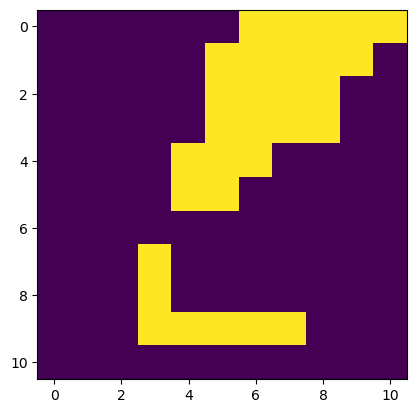

In [50]:
masked_result = binary_dilation(b, struct, iterations=3, mask=mask).astype(a.dtype)
plt.imshow(masked_result)

My suggestion would be to follow this final set of steps and apply **different** structuring elements for each of the eight wedges. Before we try to do any filtering, let's take a look at what this result looks like.

Because this is binary dilation, the 1's in our array will correspond to pixels that are either occluded or visible. The 0's are the maybes. Because every "first" maybe is a neighbor of a visible or occluded pixel, that's why we can get away with applying the dilation to the visible and occluded pixels. We can see which maybe pixles (0's) were toggled with the dilation by subtracting the input image of visible and occluded pixels.

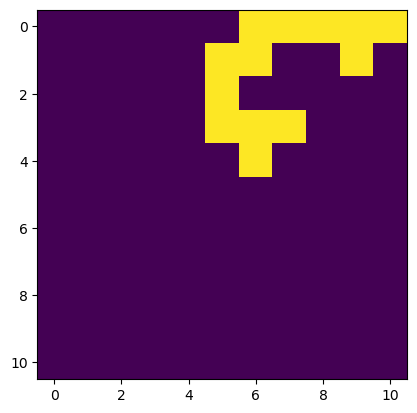

In [52]:
plt.imshow(masked_result - b)

These are the pixels that will be kept as maybes. Anything else (other than the existing visible and occluded pixels) will be marked as occluded.